Predykcja pozycji zawodników w grze FIFA w oparciu o oceny ich atrybutów

In [2]:
#import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from skimage.color import rgb2gray
from skimage.exposure import histogram

#wczytanie danych i usunięcie duplikatów
df = pd.read_csv("Fifa 19 Fut Players.csv")
df = df.drop_duplicates()
df.head()

,Name,Ratings,Position,Version,PS,SKI,WF,WR,PAC,SHO,...,DRI,DEF,PHY,Body,Popularity,BS,IGS,Club,League,Country
0,Cristiano Ronaldo,99,ST,TOTY,7.19M,5,4,H \ L,97,99,...,98,50,95,"187cm | 6'2""",4833,534,2520,Juventus,Serie A TIM,Portugal
1,Lionel Messi,99,CF,TOTY,4.49M,4,4,M \ M,97,99,...,99,45,85,"170cm | 5'7""",3785,523,2507,FC Barcelona,LaLiga Santander,Argentina
2,Luka Modric,99,CM,TOTY,3.75M,4,4,H \ H,90,94,...,99,94,90,"172cm | 5'8""",956,566,2701,Real Madrid,LaLiga Santander,Croatia
3,Pelé,99,CAM,Icon,6.78M,5,4,H \ M,96,98,...,97,62,80,"173cm | 5'8""",1198,530,2563,Icons,Icons,Brazil
4,Lionel Messi,99,RW,CL TOTT,1.65M,4,4,M \ M,94,99,...,99,38,72,"170cm | 5'7""",678,500,2412,FC Barcelona,LaLiga Santander,Argentina


In [3]:
#wczytanie danych i usunięcie duplikatów dla błędnego zbioru
df_bad = pd.read_csv("FIFA19.csv")
df_bad = df_bad.drop_duplicates()
df_bad

,NAME,CLUB,LEAGUE,POSITION,TIER,RATING,PACE,SHOOTING,PASSING,DRIBBLING,DEFENDING,PHYSICAL,LOADDATE
0,Pelé,Icons,Icons,CAM,Gold,98,95,96,93,96,60,76,2018-09-19 12:10:05
1,Diego Maradona,Icons,Icons,CAM,Gold,97,92,93,92,97,40,76,2018-09-19 12:10:05
2,Ronaldo,Icons,Icons,ST,Gold,96,97,95,81,95,45,76,2018-09-19 12:10:05
3,Pelé,Icons,Icons,CF,Gold,95,96,93,90,95,56,75,2018-09-19 12:10:05
4,Diego Maradona,Icons,Icons,CAM,Gold,95,88,91,90,95,42,75,2018-09-19 12:10:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13628,Halldor Stenevik,SK Brann,Norway Eliteserien,LW,Bronze,53,63,42,38,50,41,56,2018-09-19 12:10:08
13629,Giles Phillips,Queens Park Rangers,England EFL Championship,CB,Bronze,53,56,39,44,46,44,45,2018-09-19 12:10:08
13630,Adam Crookes,Lincoln City,England EFL League Two,CDM,Bronze,53,58,32,46,49,44,48,2018-09-19 12:10:08
13631,Lucas Hedlund,BK Häcken,Sweden Allsvenskan,LW,Bronze,53,59,32,46,47,45,47,2018-09-19 12:10:08


In [4]:
#zaprezentowanie różnic pomiędzy zbiorami na podstawie zawodnika Liu Roufan
liu = df.drop(columns=["Version", "PS", "SKI", "WF", "WR", "Body", "Popularity", "BS", "IGS", "Club", "League", "Country"])
liu_bad = df_bad.drop(columns=["CLUB", "LEAGUE", "TIER", "LOADDATE"])
print(liu_bad.iloc[12707])
print()
print(liu.iloc[19193])

NAME         Liu Ruofan
POSITION             CF
RATING               58
PACE                 71
SHOOTING             29
PASSING              41
DRIBBLING            48
DEFENDING            55
PHYSICAL             66
Name: 12708, dtype: object

Name        Ruofan Liu
Ratings             58
Position            CF
PAC                 73
SHO                 53
PAS                 51
DRI                 58
DEF                 23
PHY                 62
Name: 19193, dtype: object


In [5]:
#wyświetlenie wszystkich atrybutów
columns = df.columns
for col in columns:
    print(col)

Name
Ratings
Position
Version
PS
SKI
WF
WR
PAC
SHO
PAS
DRI
DEF
PHY
Body
Popularity
BS
IGS
Club
League
Country


**Analiza związku wartości cech z pozycją**

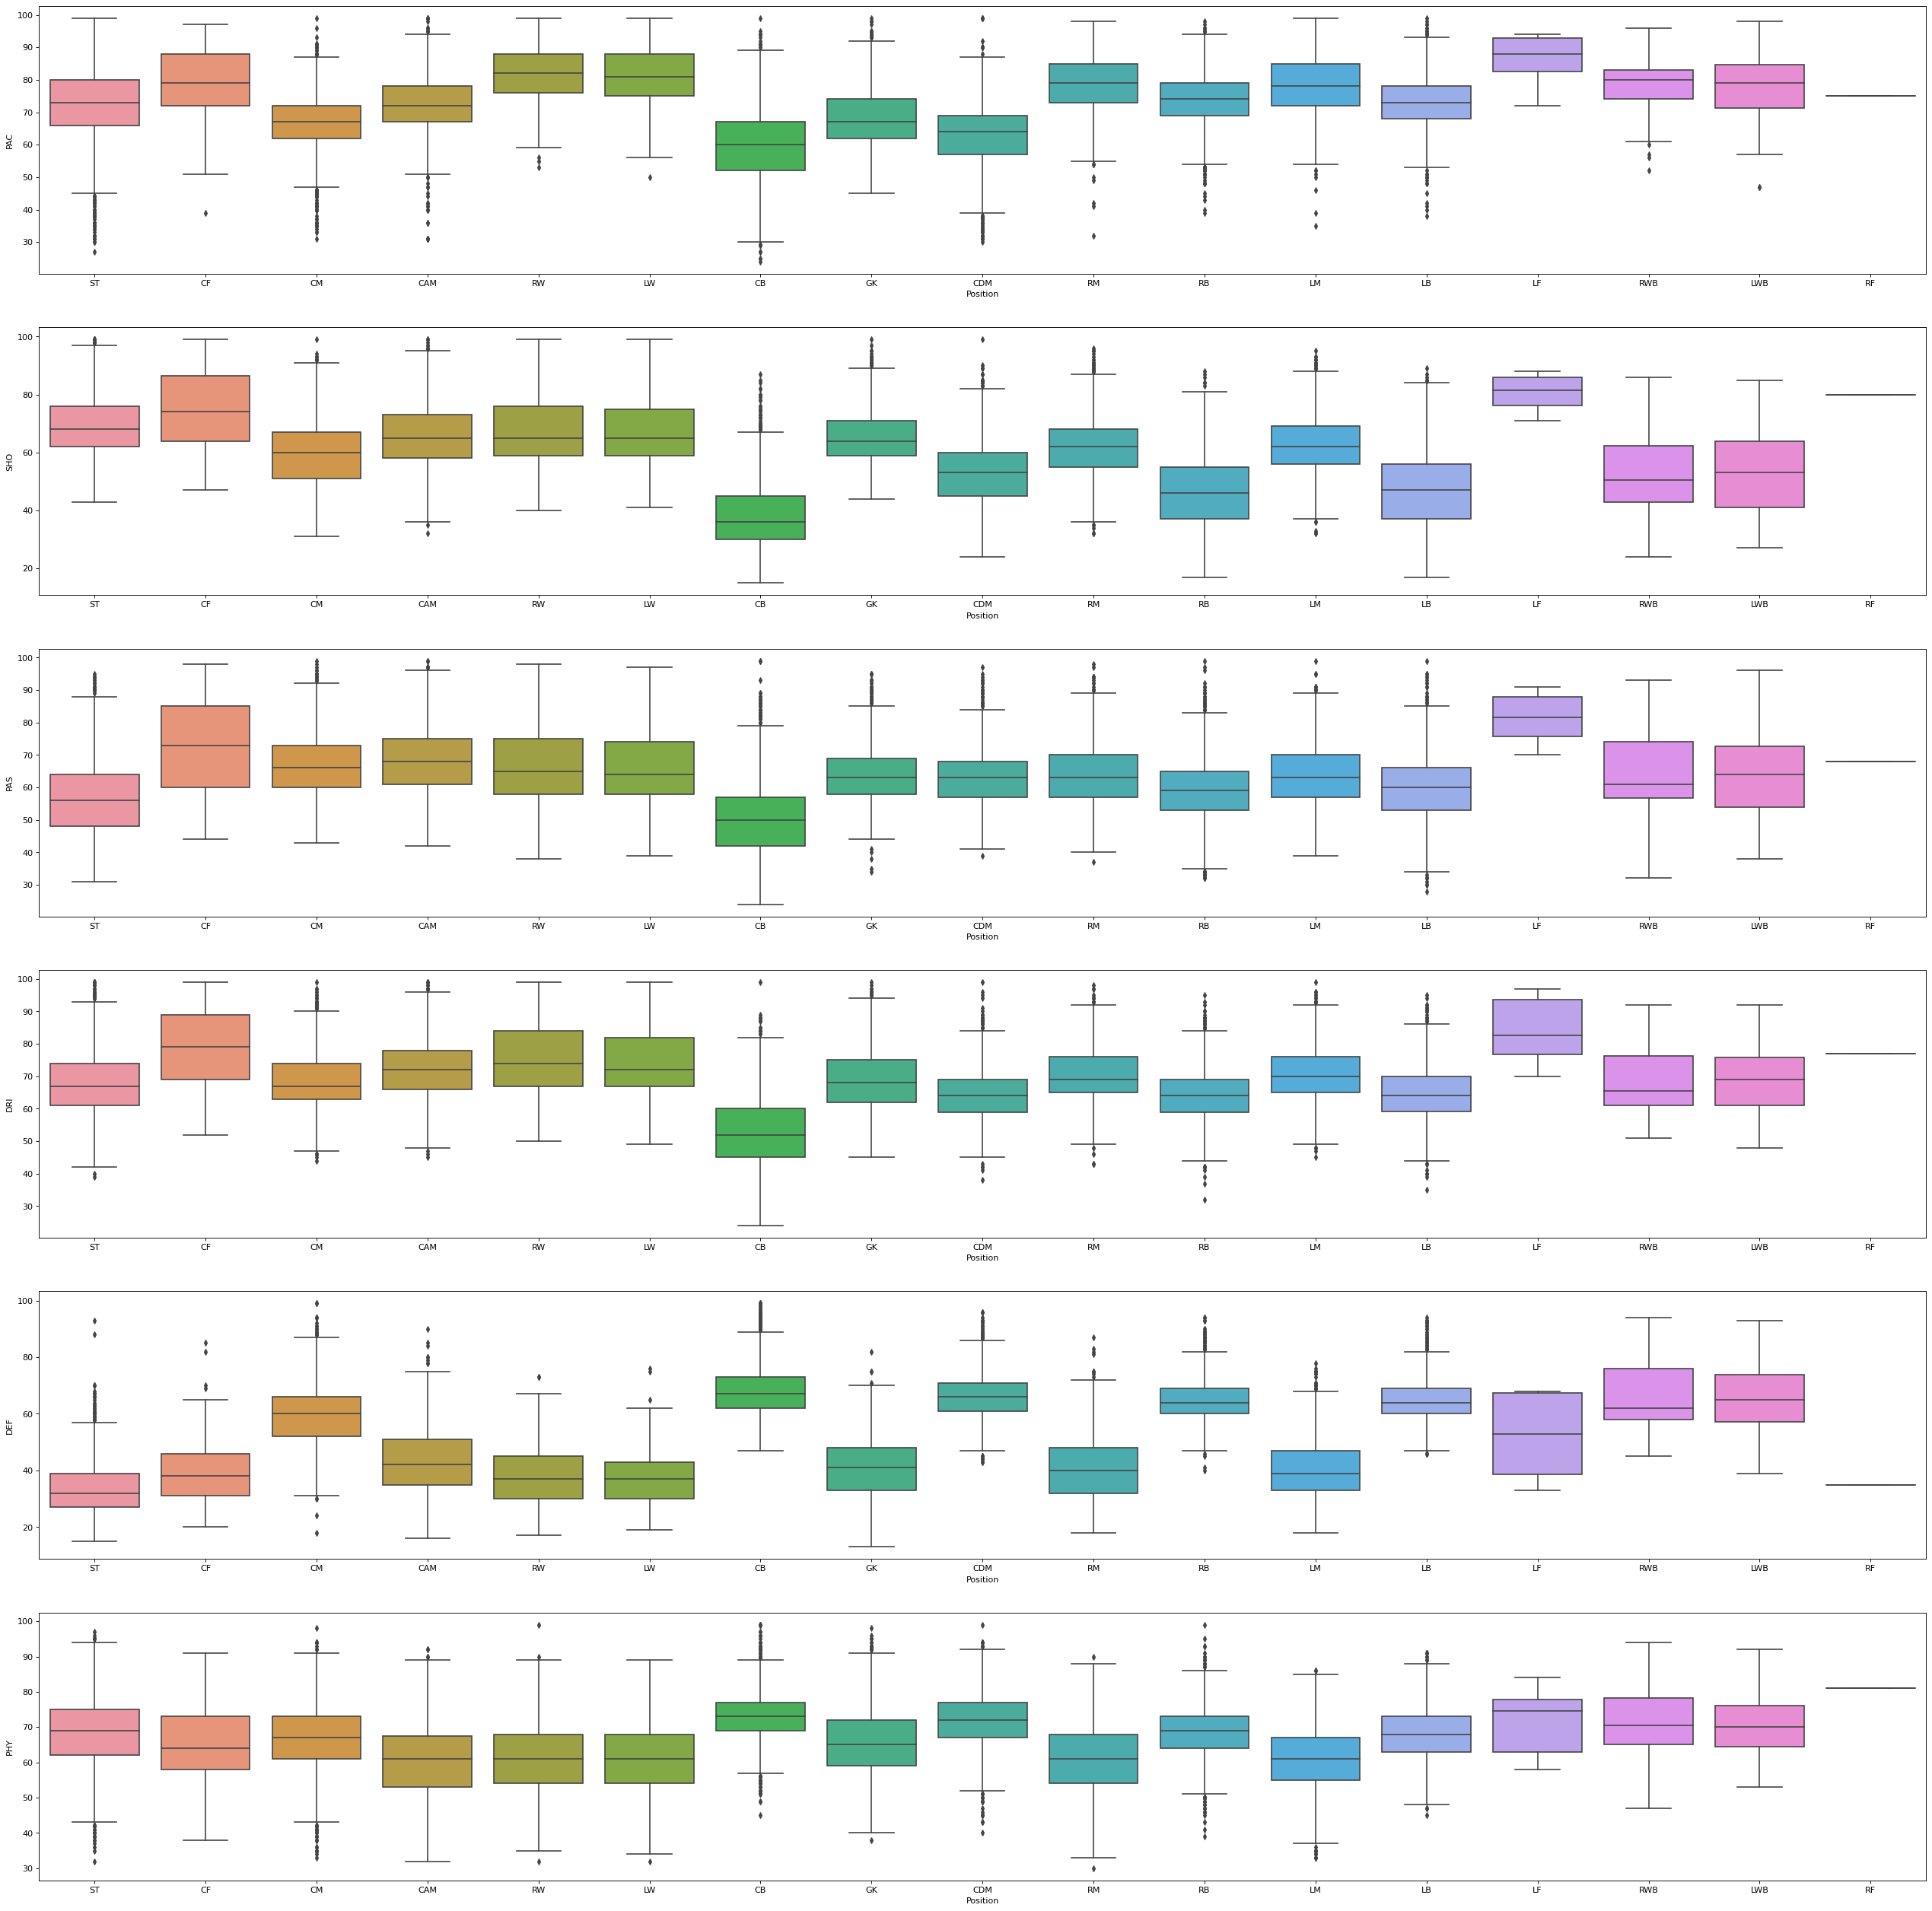

In [6]:
#wykresy pudełkowe dla konkretnych statystyk i pozycji
stats_to_plot = ["PAC", "SHO", "PAS", "DRI", "DEF", "PHY"]
plt.figure(figsize=(40,40), dpi= 80)
i = 1;
for column in stats_to_plot:
    plt.subplot(6,1,i)
    sns.boxplot(data = df, x = "Position", y = column)
    i+=1

**Liczebność zawodników z danej pozycji w zbiorze**

CB     3434
ST     3335
CM     2528
GK     2111
CDM    1565
LB     1466
RB     1433
RM     1304
LM     1256
CAM    1227
LW      494
RW      466
CF      167
RWB      80
LWB      70
LF        6
RF        1
Name: Position, dtype: int64

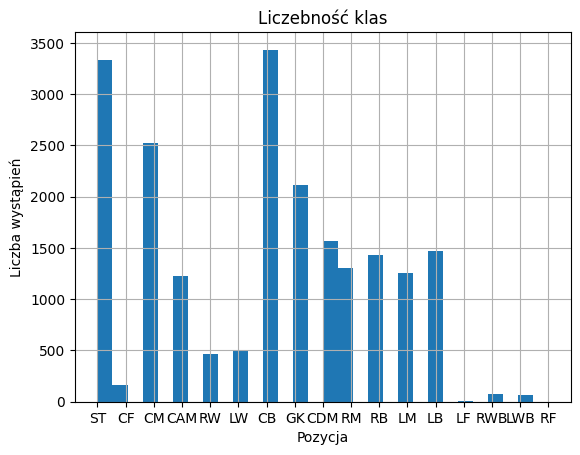

In [7]:
#histogram liczebności pozycji
df["Position"].hist(bins = 30)
plt.title("Liczebność klas")
plt.xlabel("Pozycja")
plt.ylabel("Liczba wystąpień")
positions = df["Position"].value_counts()
positions

**Redukcja pozycji**

In [8]:
#usunięcie niepotrzebnych pozycji i atrybutów oraz zmiana atrybutu "Body"
reduced = df.drop(index=(df[df.Position.isin(["LF","RF","GK"])]).index, columns=["Popularity", "BS", "IGS", "PS"])
heigths = []
for heigth in reduced["Body"].values:
    heigths.append(heigth.split("|")[0][:3])
reduced["Body"] = heigths
reduced["Body"] = reduced["Body"].astype(int)
reduced

,Name,Ratings,Position,Version,SKI,WF,WR,PAC,SHO,PAS,DRI,DEF,PHY,Body,Club,League,Country
0,Cristiano Ronaldo,99,ST,TOTY,5,4,H \ L,97,99,95,98,50,95,187,Juventus,Serie A TIM,Portugal
1,Lionel Messi,99,CF,TOTY,4,4,M \ M,97,99,98,99,45,85,170,FC Barcelona,LaLiga Santander,Argentina
2,Luka Modric,99,CM,TOTY,4,4,H \ H,90,94,99,99,94,90,172,Real Madrid,LaLiga Santander,Croatia
3,Pelé,99,CAM,Icon,5,4,H \ M,96,98,97,97,62,80,173,Icons,Icons,Brazil
4,Lionel Messi,99,RW,CL TOTT,4,4,M \ M,94,99,98,99,38,72,170,FC Barcelona,LaLiga Santander,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20938,David Norman Jr.,47,CM,Normal,2,3,M \ M,62,35,47,47,41,61,188,Vancouver Whitecaps FC,Major League Soccer,Canada
20939,Noah Christoffersson,47,ST,Normal,2,2,M \ M,40,46,33,40,21,56,190,Trelleborgs FF,Allsvenskan,Sweden
20940,Kieron Olsen,47,RB,Normal,2,3,M \ M,58,33,45,47,47,45,178,Carlisle United,EFL League Two,England
20941,Lee Watkins,47,CM,Normal,2,3,M \ M,65,37,45,46,40,58,175,Cambridge United,EFL League Two,England


In [9]:
#wartości średnie ze statystyk dla całego zbioru
df2 = reduced.mean(axis=0)
print("Wartości średnie dla danych statystyk:")
print(df2)

#mediany ze statystyk dla całego zbioru
df3 = reduced.median(axis=0)
print()
print("Mediana dla danych statystyk:")
print(df3)

Wartości średnie dla danych statystyk:
Ratings     69.510544
SKI          2.687437
WF           3.091474
PAC         69.996335
SHO         56.154954
PAS         60.495989
DRI         65.546667
DEF         53.110385
PHY         67.366162
Body       180.593997
dtype: float64

Mediana dla danych statystyk:
Ratings     68.0
SKI          3.0
WF           3.0
PAC         71.0
SHO         57.0
PAS         60.0
DRI         66.0
DEF         57.0
PHY         68.0
Body       180.0
dtype: float64


In [10]:
#wartości średnie ze statystyk dla każdej z pozycji
for position in reduced["Position"].unique():
    mean_val = reduced[reduced["Position"] == position].mean(axis=0)
    print("Wartości średnie dla danych statystyk zawodników na pozycji %s:"%(position))
    print(mean_val)
    print ()

Wartości średnie dla danych statystyk zawodników na pozycji ST:
Ratings     70.432684
SKI          2.788906
WF           3.206897
PAC         72.630885
SHO         69.335232
PAS         57.188306
DRI         68.096252
DEF         33.391304
PHY         68.576912
Body       182.710945
dtype: float64

Wartości średnie dla danych statystyk zawodników na pozycji CF:
Ratings     76.880240
SKI          3.473054
WF           3.586826
PAC         79.449102
SHO         74.946108
PAS         72.011976
DRI         78.646707
DEF         39.766467
PHY         65.580838
Body       177.832335
dtype: float64

Wartości średnie dla danych statystyk zawodników na pozycji CM:
Ratings     68.725870
SKI          2.818038
WF           3.173655
PAC         66.758703
SHO         59.682358
PAS         66.894383
DRI         68.612342
DEF         59.566851
PHY         66.826741
Body       179.102057
dtype: float64

Wartości średnie dla danych statystyk zawodników na pozycji CAM:
Ratings     71.315403
SKI          

In [11]:
#wyświetlenie liczby zawodników grających w danych ligach
leagues_counts = df["League"].value_counts()
print(leagues_counts)

#wyświetlenie liczby zawodników grających dla danych krajów
countries_counts = df["Country"].value_counts()
print(countries_counts[:50])
print(countries_counts[50:100])
print(countries_counts[100:])
countries_counts["Grenada"]

Premier League                        1201
Serie A TIM                            968
LaLiga Santander                       957
Bundesliga                             911
Ligue 1 Conforama                      875
EFL Championship                       850
EFL League One                         761
Major League Soccer                    759
EFL League Two                         712
Eredivisie                             621
Meiji Yasuda J1 League                 607
3. Liga                                585
Bundesliga 2                           562
Süper Lig                              558
Saudi Professional League              552
LaLiga 1 I 2 I 3                       547
CSL                                    539
Liga NOS                               532
LIGA Bancomer MX                       524
SAF                                    519
Belgium Pro League                     519
Liga Dimayor                           514
Calcio B                               505
Domino’s Li

2

**Model**

In [12]:
#Wyrzucenie wartości skrajnych ze zbioru
top_quantile = reduced["Ratings"].quantile(0.99)
bottom_quantile = reduced["Ratings"].quantile(0.01)
reduced_data = reduced[(reduced["Ratings"] < top_quantile) & (reduced["Ratings"] > bottom_quantile)]
model_data = pd.DataFrame()

model_stats = ["PACtoRT", "SHOtoRT", "PAStoRT", "DRItoRT", "DEFtoRT", "PHYtoRT"] #współczynniki pozycji
positions = reduced_data["Position"].values # wyciagnięcie lini pozycji
model_values = {k : [] for k in model_stats} #słownik na kolumny z odpowiednimi wartościami współczynnika pozycji
ratings = reduced_data["Ratings"].values #informacje o ocenach do wyliczania współczynnika pozycji

#wyliczenie współczynnika pozycji
for key in model_values:
    pom = reduced_data[key[:3]].values
    values = []
    for i in range(len(pom)):
        values.append(pom[i]/ratings[i])
    model_values[key] = values
    model_data[key] = values

model_data["Position"] = positions # uzupełnienie ramki z danymi do modelu
model_data_with_side_pos = model_data.copy() # ramka do porównania dokładności bez ulednolicenia pozycji
model_data.Position[model_data.Position.isin(["RW","LW","LM","RM"])] = "SM" #SM - side midfielder, boczny pomocnik
model_data.Position[model_data.Position.isin(["RB","LB","LWB","RWB"])] = "SB" #SM - side back, boczny obrońca
model_data

/tmp/ipykernel_5504/1008425108.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.Position[model_data.Position.isin(["RW","LW","LM","RM"])] = "SM" #SM - side midfielder, boczny pomocnik
/tmp/ipykernel_5504/1008425108.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.Position[model_data.Position.isin(["RB","LB","LWB","RWB"])] = "SB" #SM - side back, boczny obrońca


,PACtoRT,SHOtoRT,PAStoRT,DRItoRT,DEFtoRT,PHYtoRT,Position
0,0.760870,0.489130,0.739130,0.630435,1.021739,0.978261,CB
1,1.000000,0.956522,0.967391,1.000000,0.445652,0.869565,SM
2,0.902174,1.000000,0.967391,1.000000,0.467391,0.728261,CF
3,0.956522,0.989130,0.793478,0.934783,0.391304,0.826087,ST
4,0.739130,0.695652,0.902174,0.847826,1.010870,0.923913,CB
...,...,...,...,...,...,...,...
18417,1.250000,0.673077,0.942308,0.923077,1.000000,0.826923,CDM
18418,1.423077,0.980769,0.750000,1.000000,0.346154,0.923077,ST
18419,1.211538,0.500000,0.615385,0.923077,1.019231,1.000000,SB
18420,1.096154,0.903846,1.038462,1.096154,0.923077,1.000000,CM


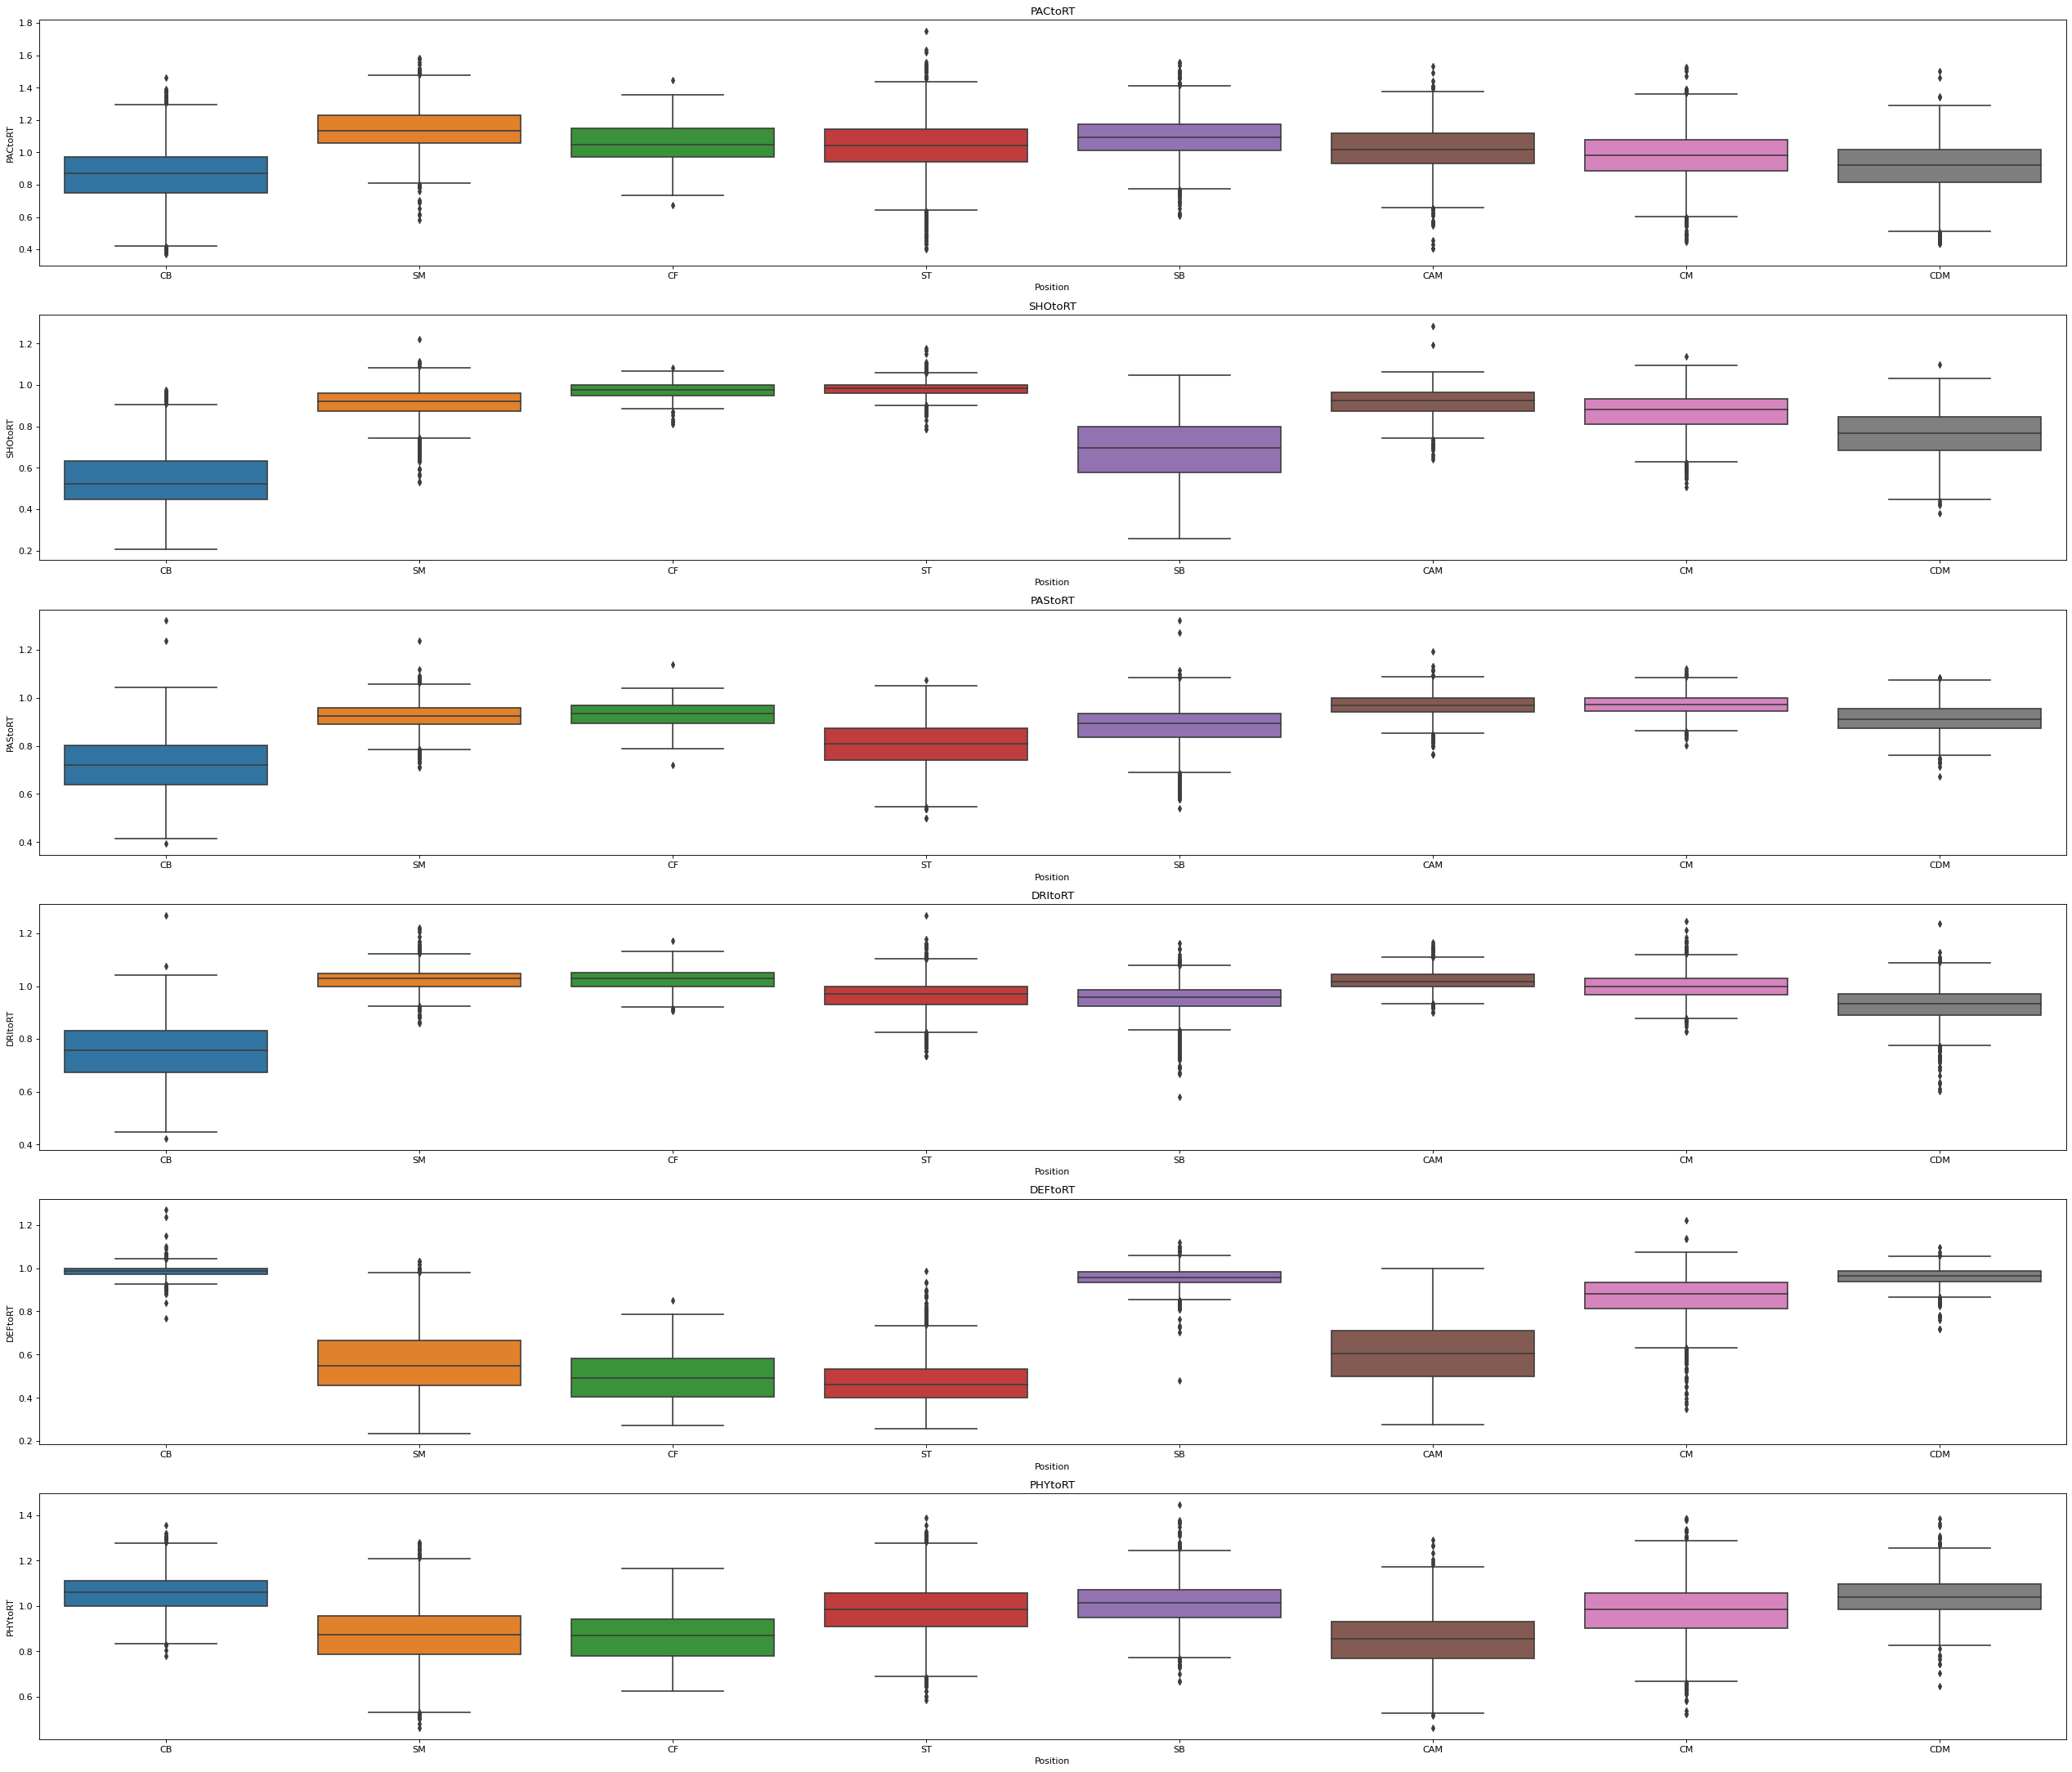

In [13]:
plt.figure(figsize=(40,40), dpi= 80)
i = 1;

#Wykresy wartości współczynnika pozycji względem pozycji
for column in [*model_stats]:
    plt.subplot(7,1,i)
    sns.boxplot(data = model_data, x = "Position", y = column)
    plt.title(column)
    i+=1


In [14]:
#zaimportowanie bibliotek do realizacji kNN
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [15]:
#funkcja weryfikująca rezulataty
def train_and_verify(model, data, split, n, show_cm = False):
    # model - model klasyfikatora
    # data - dane jako ramka danych gdzie ostatnia kolumna to etykiety
    # split - proporcja podziału zbioru na treningowy i tesotwy
    
    # zamiana etykiet słownych na liczbowe i zmapowanie ich, żeby potem bez problemu można je było odczytać z wykresu
    pos_list = data["Position"].unique()
    label_encoder = LabelEncoder()
    data["Position"] = label_encoder.fit_transform(data["Position"])
    pos_encoded = data["Position"].unique()
    pos_mapping = {pos: encoded for pos, encoded in zip(pos_list,pos_encoded)}

    # podział zbioru na treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:-1],data.iloc[:,-1], test_size= split)

    # trenowanie modelu
    model.fit(X_train.iloc[:],y_train)

    # wyniki klasyfikacji
    train_result = model.predict(X_train.iloc[:])
    test_result = model.predict(X_test.iloc[:])

    # tworzenie macierzy pomyłek
    cm_train = confusion_matrix(y_train, train_result)
    cm_test = confusion_matrix(y_test, test_result)

    #wyliczenie dokładności modelu
    train_acc = np.sum(np.diag(cm_train))/np.sum(cm_train)
    test_acc = np.sum(np.diag(cm_test))/np.sum(cm_test)

    # Wypisane rezultatów
    if(show_cm):
        lbls = sorted(pos_mapping)
        plt.figure(figsize=(20,7))
        plt.subplot(1,2,1)
        plt.title(f"Dane treningowe, dokładność: {train_acc}, n = {n}")
        sns.heatmap(cm_train, annot = True, xticklabels=lbls, yticklabels=lbls, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))
        plt.subplot(1,2,2)
        plt.title(f"Dane testowe, dokładność: {test_acc}, n = {n}")
        sns.heatmap(cm_test, annot = True, xticklabels=lbls, yticklabels=lbls, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))
    return (train_acc, test_acc)

In [16]:
#Funkcja do pokazania wykresu porównującego dokłądność w zależności od wybranego n
def plot_results(results, split):
    lists = sorted(results.items()) 
    x, y = zip(*lists)
    plt.plot(x, y)
    plt.title(f"Dokładność modelu w zależności od liczby sąsiadów n, split = {split}")
    plt.xlabel("Liczba sąsiadów n")
    plt.ylabel("Poprawność")
    plt.grid()
    plt.show()

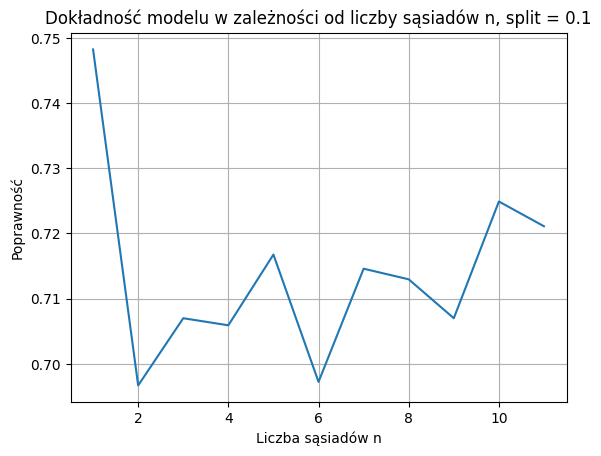

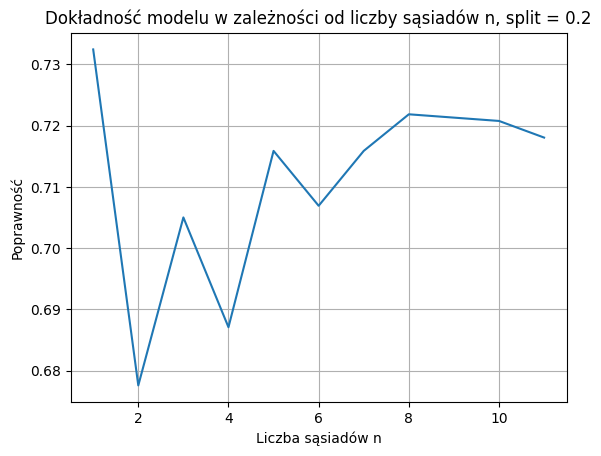

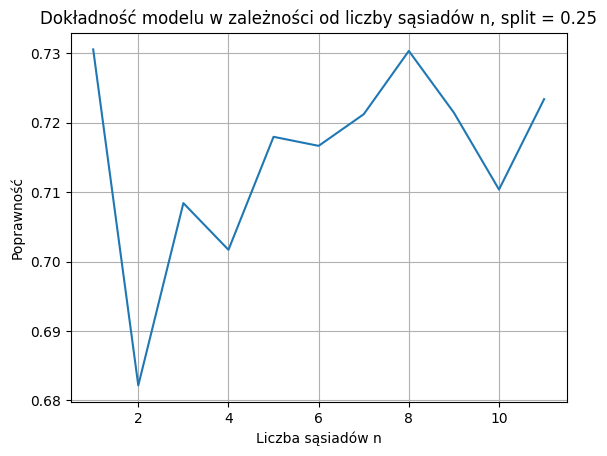

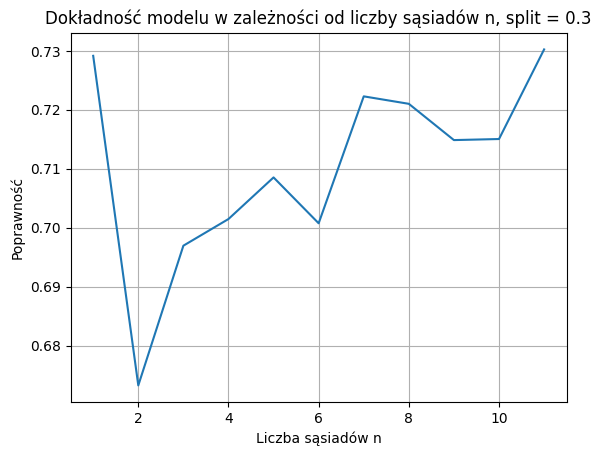

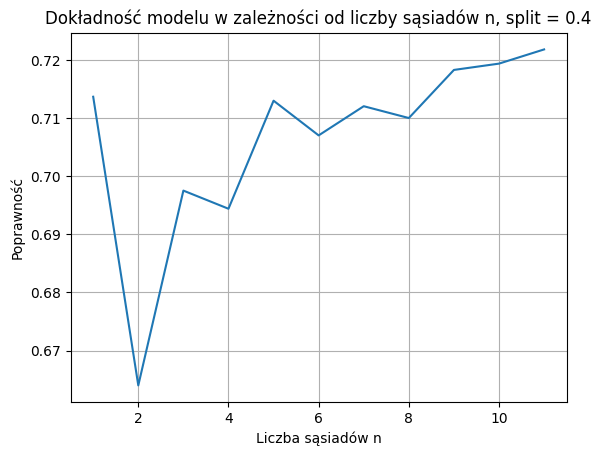

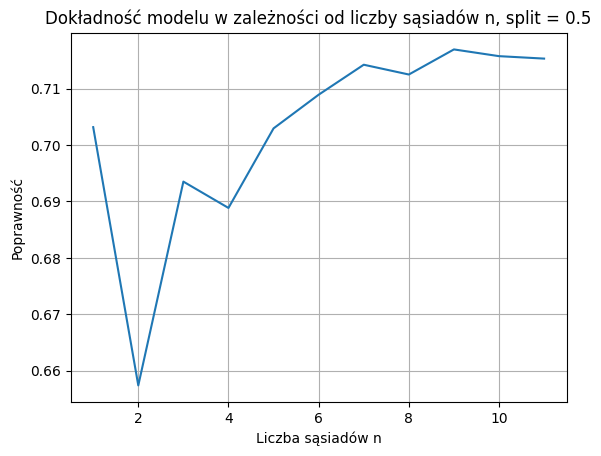

In [22]:
# Wartości współczynnika podziału
split = [0.1, 0.2 , 0.25, 0.30, 0.40, 0.50]

# stworzenie modelu kNN
n = 11
results = {}

#porównanie skuteczności modelu przy różnych wartościach współczynnika podziału i liczby najbliższych sąsiadów n
for s in split:
    for i in range(n):
        model = KNeighborsClassifier(n_neighbors=i + 1)
        result = train_and_verify(model,model_data.copy(),s, i+1)
        #print(f"n = {i}, split = {split}\nDokładność dla danych treningowych: {result[0]}\nDokładność dla danych testowych: {result[1]}\nRóżnica w dokładności: {result[0]-result[1]}")
        results[i+1] = result[1] #wykorzystamy to do dobrania odpowiedniej liczby n dla danych testowych
    plot_results(results, s)


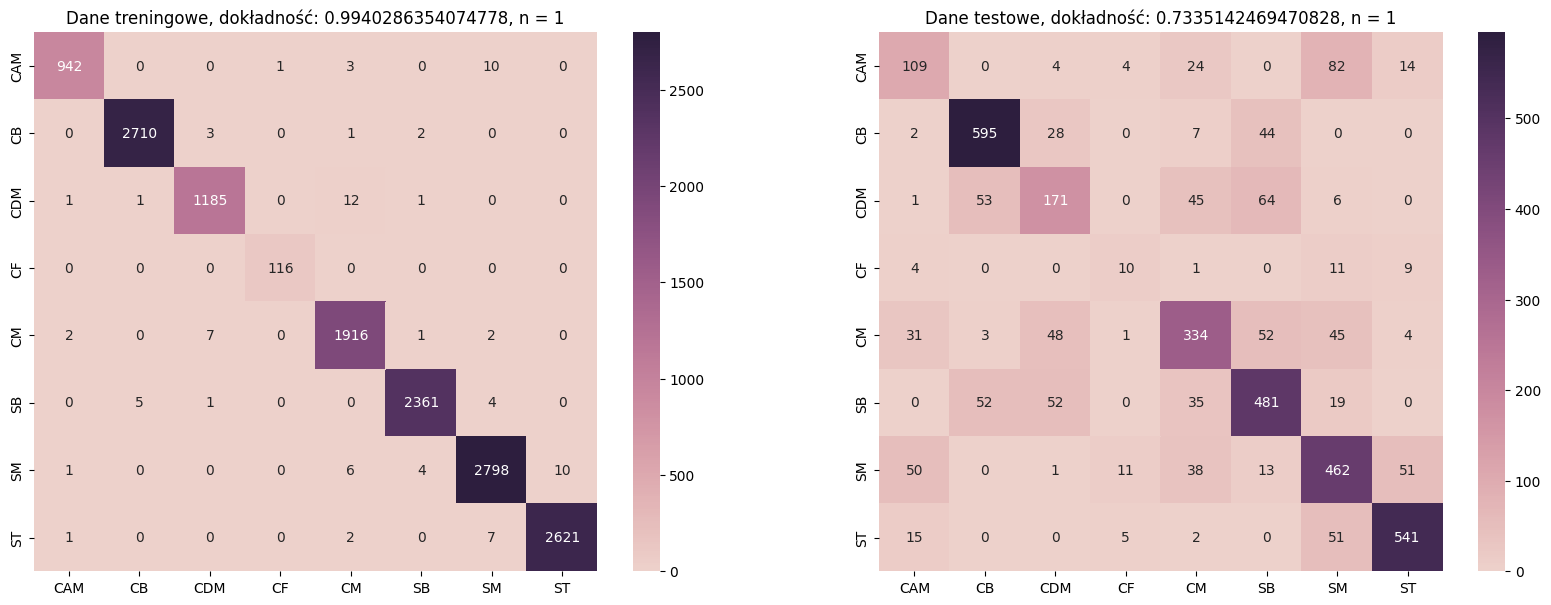

In [18]:
model = KNeighborsClassifier(n_neighbors=1)
result = train_and_verify(model,model_data.copy(),0.2, 1,True)

In [19]:
# badaie dokładność dla niedużego splitu i n = 1, bo z analizy wykresów wyszła zaskakująco wysoka dokładność
sum = 0
for i in range (50):
    model = KNeighborsClassifier(n_neighbors=1)
    result = train_and_verify(model,model_data.copy(), 0.1, 1)
    sum += result[1]
print(f"Średnia dkoładność dla n = 1 i split = 0.1, przy 50 próbach: {sum/50}")


Średnia dkoładność dla n = 1 i split = 0.1, przy 50 próbach: 0.7396961475854584


**Sprawdzenie jakości klasyfikatora bez generalizacji bocznych obrońców i pomocników**

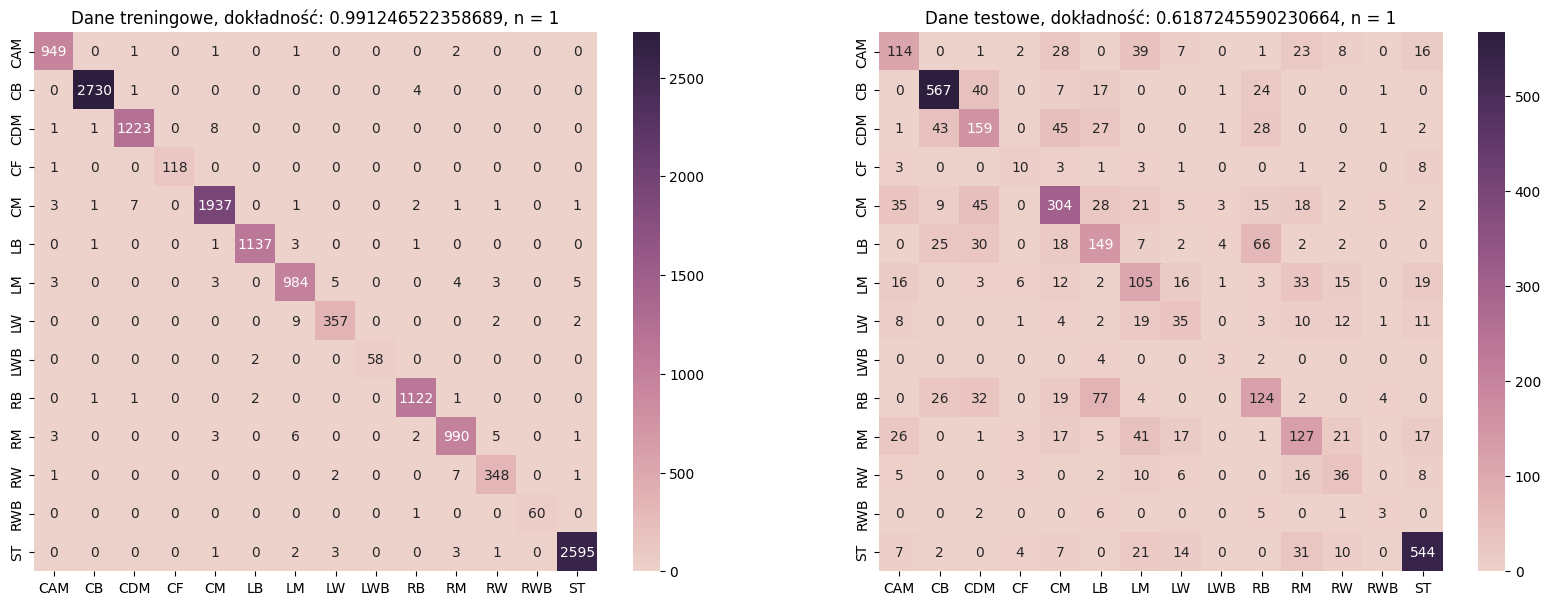

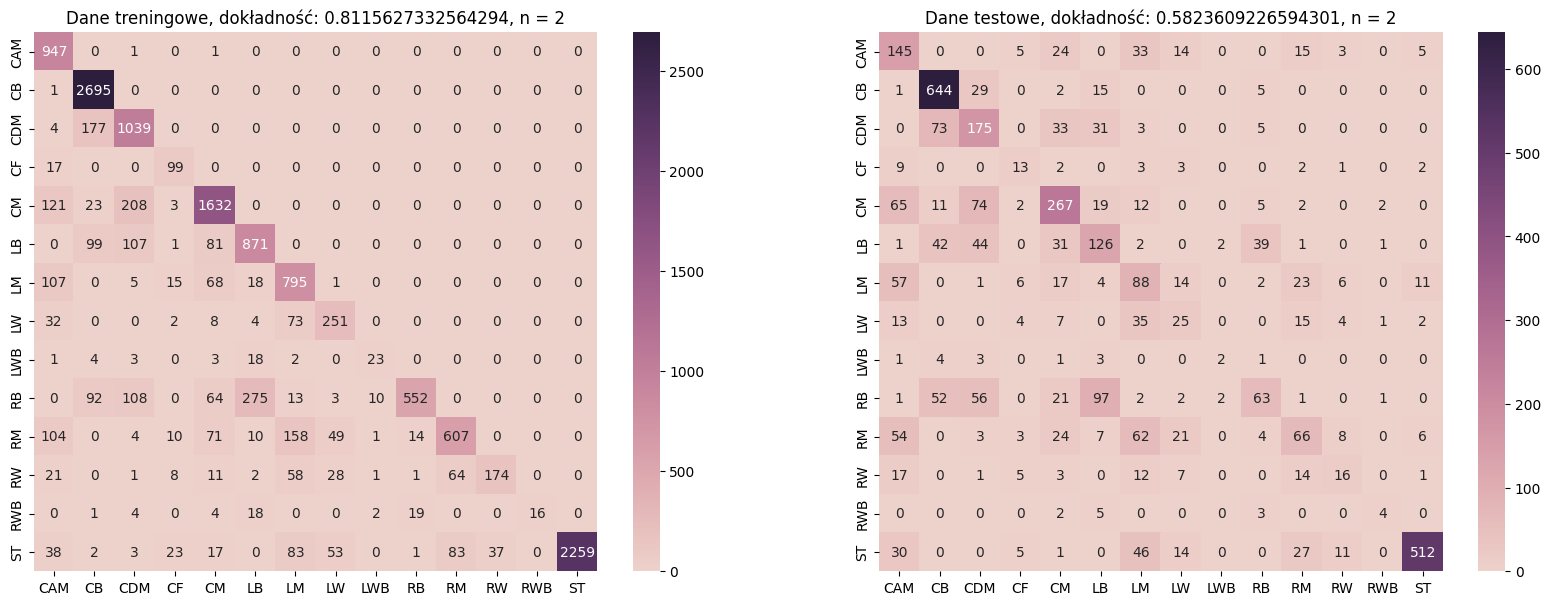

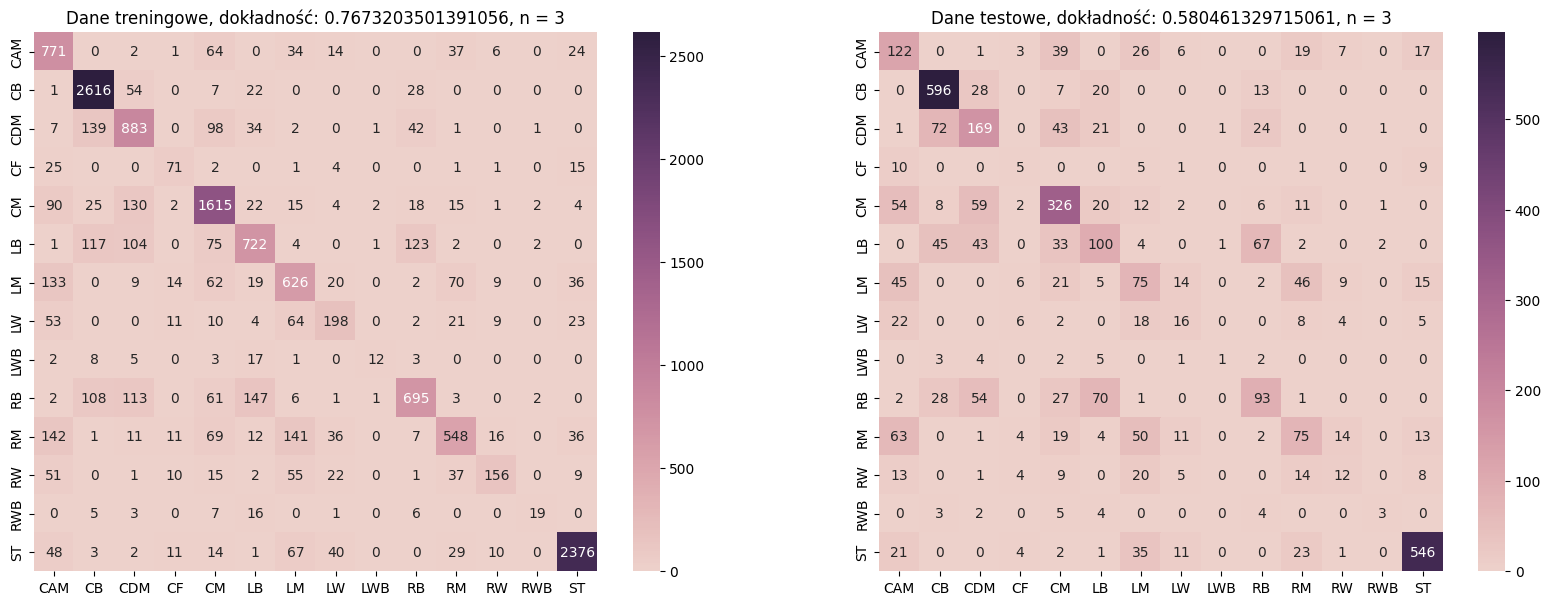

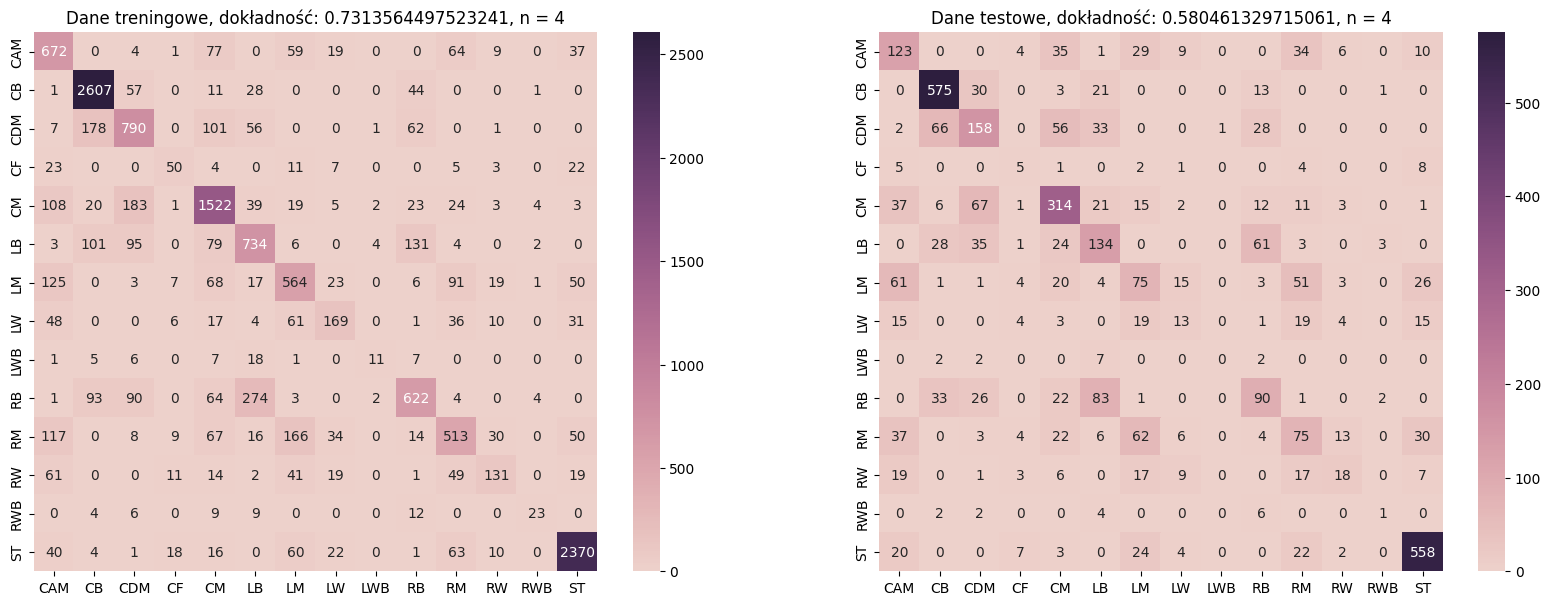

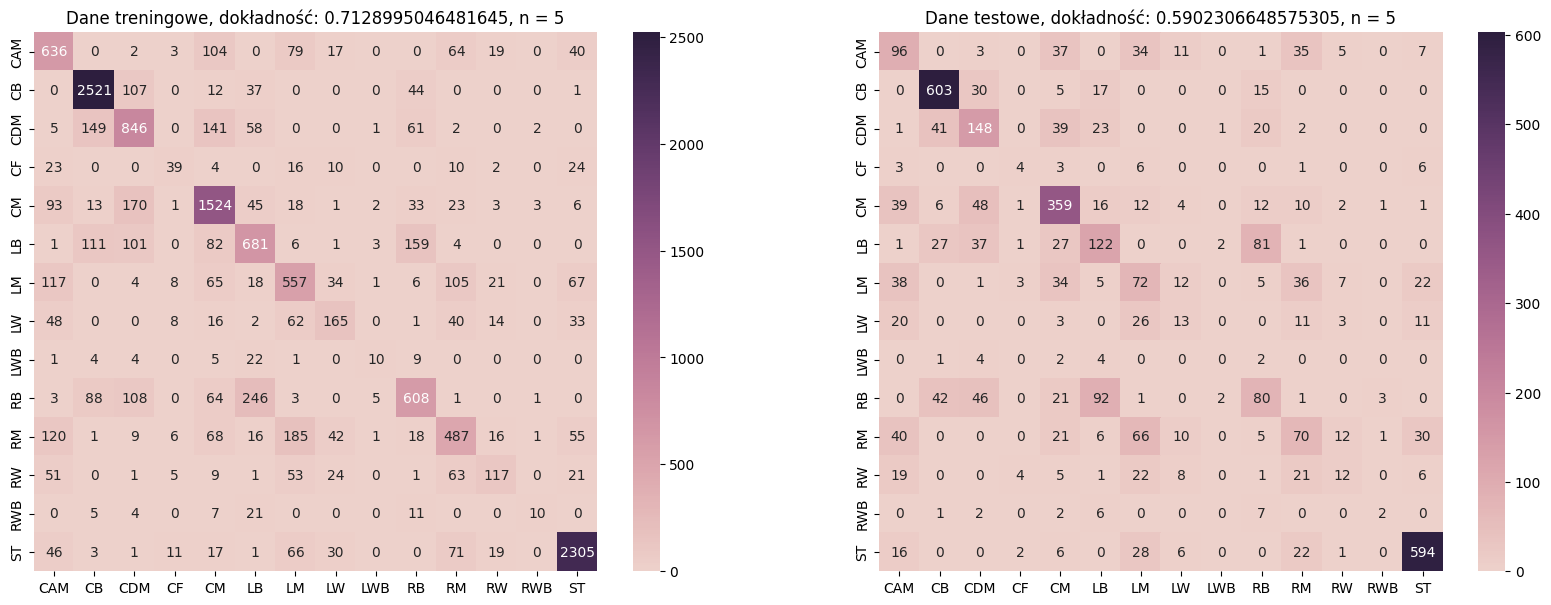

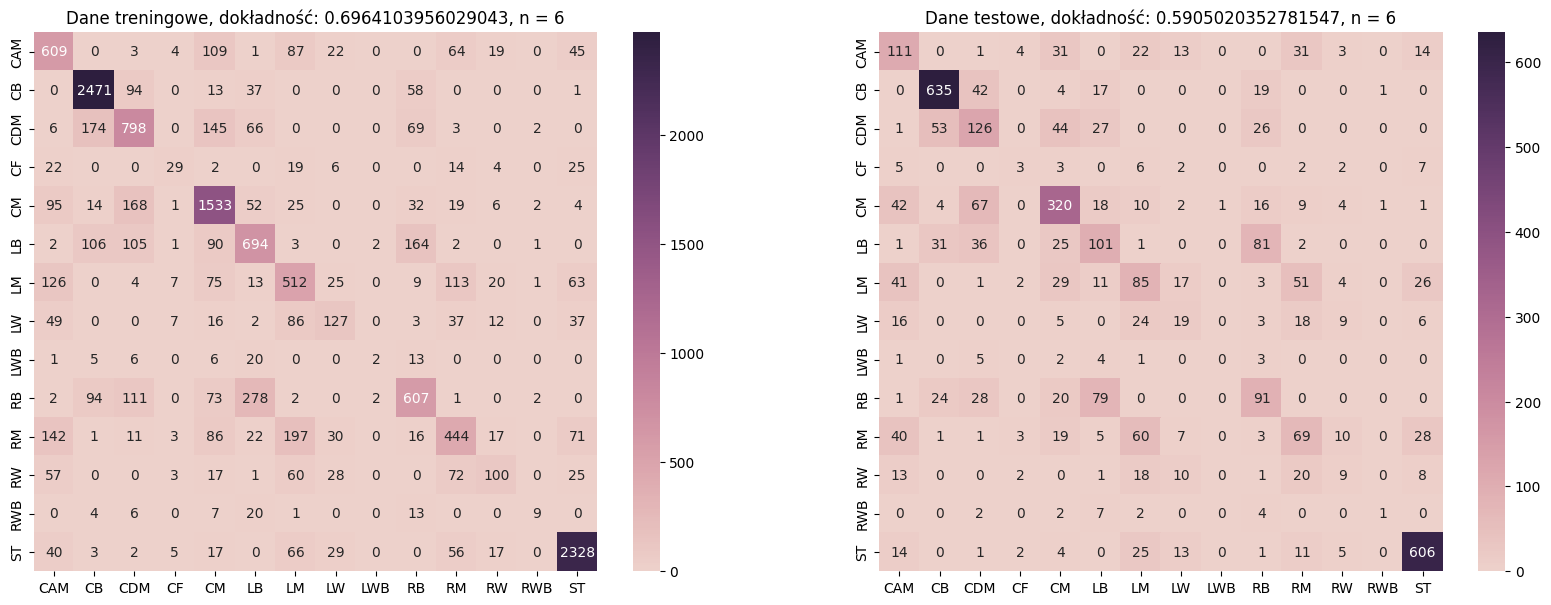

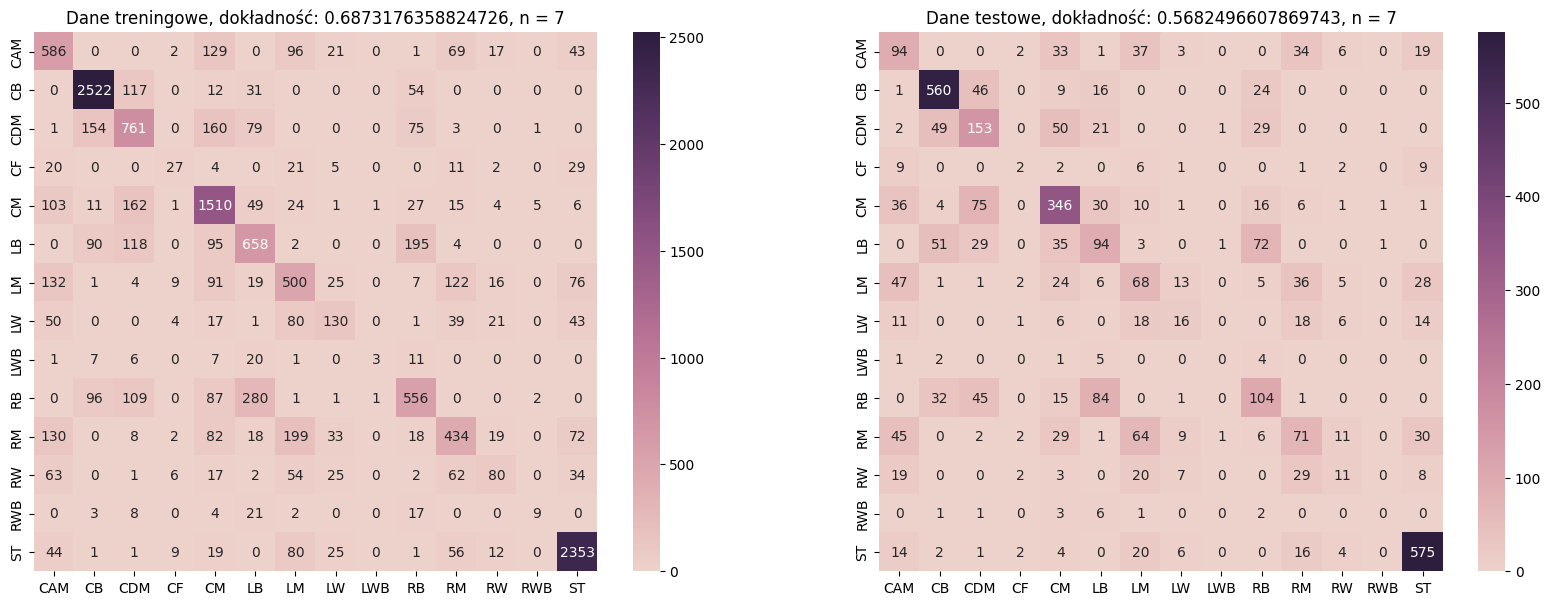

In [20]:
for i in range(7):
    model = KNeighborsClassifier(n_neighbors=i + 1)
    train_and_verify(model, model_data_with_side_pos.copy() ,0.2, i+1, True)